# **About the Dataset**

##### The Dataset "Global-Superstore", was downdloaded from Power BI Sample Data Set [https://powerbidocs.com/2019/11/28/power-bi-sample-data-set-for-practice/] <br> It comprises four years of retail transaction records, providing a comprehensive overview of global sales and order information.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import os
sns.set()

## **Reading the files and inspecting the data**

#### Checking duplicated, nulls, data types and looking into data summary statistics

In [2]:
# reading the files
# df_read = pd.read_csv("_Project_2/Data/Global-Superstore.csv")

In [3]:
# Change encoding type due to error when importing the file with 'utf-8'
df_read = pd.read_csv("../Data/Global-Superstore.csv", encoding= "latin-1")

In [4]:
# displaying all rows and looking to few rows
pd.set_option("display.max_columns", None)
df_read.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
# looking into table summary
df_read.describe(include= "all").fillna("-")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.0,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,9994.0,51290,51290,51290,51290,51290,51290,51290.0,51290.0,51290.0,51290.0,51290.0,51290
unique,-,25035,1430,1464,4,1590,795,3,3636,1094,147,-,7,13,10292,3,17,3788,-,-,-,-,-,4
top,-,CA-2014-100111,6/18/2014,11/22/2014,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,-,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,-,-,-,-,-,Medium
freq,-,14,135,130,30775,97,108,26518,915,2001,9994,-,11002,11117,35,31273,6152,227,-,-,-,-,-,29433
mean,25645.5,-,-,-,-,-,-,-,-,-,-,55190.379428,-,-,-,-,-,-,246.490581,3.476545,0.142908,28.610982,26.375915,-
std,14806.29199,-,-,-,-,-,-,-,-,-,-,32063.69335,-,-,-,-,-,-,487.565361,2.278766,0.21228,174.340972,57.296804,-
min,1.0,-,-,-,-,-,-,-,-,-,-,1040.0,-,-,-,-,-,-,0.444,1.0,0.0,-6599.978,0.0,-
25%,12823.25,-,-,-,-,-,-,-,-,-,-,23223.0,-,-,-,-,-,-,30.758625,2.0,0.0,0.0,2.61,-
50%,25645.5,-,-,-,-,-,-,-,-,-,-,56430.5,-,-,-,-,-,-,85.053,3.0,0.0,9.24,7.79,-
75%,38467.75,-,-,-,-,-,-,-,-,-,-,90008.0,-,-,-,-,-,-,251.0532,5.0,0.2,36.81,24.45,-


In [6]:
# Checking Null
df_read.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
# Checking duplicated values
df_read.duplicated().sum()

0

In [8]:
# Checking data types
df_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

## **Dropping Unrelated Columns**
##### Selecting only the relevant columns for analysis to reduce noise in the data

In [9]:
# Dropping unwanted coumns
df_read.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
data = df_read[[
    #'Row ID', 'Order ID', 
    'Order Date', 
    # 'Ship Date', 'Ship Mode',
    # 'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 
    'Country',
    # 'Postal Code', 
    'Market', 
    # 'Region', 'Product ID', 
    'Category',
    'Sub-Category', 'Product Name', 'Sales', 'Quantity', 
    # 'Discount',
    # 'Profit', 'Shipping Cost', 'Order Priority'
]]


## **Function for Grouping and Aggregating Data**
##### The created function offers two options: **single aggregation** and **multiple aggregations**  allowing to assign custom name(s) for aggregation result column(s). <br> This modular approach simplifies the code and facilitates debugging as the analysis progresses.


In [11]:
# Function to use in exploring the data frame "aggregation and grouping"
def group_agg_type(
        agg_type, dataframe, group_on, agg_on, method= None, col_name = None, sort_column= None, ascending= None
        ):
    
    if agg_type == "single":

        # Function for single aggregation
        def agg_single(dataframe, group_on, agg_on, method, col_name):
            group_by_result = dataframe.groupby(group_on)

            agg_method_func = getattr(group_by_result[agg_on], method)
            result = agg_method_func().reset_index(name= col_name)

            return result
        
        return agg_single(dataframe, group_on, agg_on, method, col_name)
        
    elif agg_type == "multi":

        # Function for multi aggregation
        def agg_multi(dataframe, group_on, agg_on, sort_column, ascending):
            group_by_result = dataframe.groupby(group_on)

            aggregated_columns = []
            for col, agg_method, col_name in agg_on:

                agg_method_func = getattr(group_by_result[col], agg_method)
                result = agg_method_func().reset_index(name=col_name)

                aggregated_columns.append(result)

            final_result = (pd.concat(aggregated_columns, axis=1).round(2).reset_index(drop= True))
            final_result = final_result.loc[:, ~final_result.columns.duplicated(keep= "first")]

            return final_result.sort_values(by = sort_column, ascending= ascending)

        return agg_multi(dataframe, group_on, agg_on, sort_column, ascending)
    
    else:
        raise ValueError("Check Parameters!")

## **Function for Checking Data Hierarchy**
##### This function utilizes the previously created function and returns a flag if the hierarchy from selected columns contains data inconsistencies.


In [12]:
# Function to check columns with hierarchy
def check_hierarchy(df_check, group_col, check_col):

    col_hierarchy = group_agg_type(
        agg_type= "single", dataframe= df_check, group_on= group_col,
        agg_on= check_col, method= "nunique", col_name= f"{check_col}_Count"
    )

    # returns when values from both condition are equal
    if col_hierarchy[f"{check_col}_Count"].sum() == df_check[check_col].nunique():
        print("No, Inconsistency")

    # returns when values from both are not equal
    else:
        print(f"Number of Inconsistencies in {check_col}: {col_hierarchy[f'{check_col}_Count'].sum() - df_check[check_col].nunique()}")

## **Function for Extracting Inconsistent Data**
##### This function, building upon the previously created function, provides two options for extracting inconsistent data: either by column or within the hierarchy.


In [13]:
# Function to extract the value that produce anomaly in data hierarchy
def extract_anomaly(extract_in, df_check, group_col, anomaly_on):
    
    # add unique values column using index value
    df_check["Row_no"] = df_check.index
    
    col_hierarchy =  group_agg_type(
        agg_type= "single", dataframe= df_check[["Row_no", group_col, anomaly_on]],
        group_on= [group_col, anomaly_on] , agg_on= "Row_no", method= "size", col_name= "Row_Count")

    col_anomaly =  group_agg_type(
        agg_type= "single", dataframe= col_hierarchy, group_on= anomaly_on,
        agg_on= anomaly_on, method= "size", col_name= "Count").loc[lambda x: x["Count"]> 1]

    col_result = col_anomaly
    
    df_check.drop(columns = "Row_no", inplace= True)

    # returns the inconsistent data in column
    if extract_in == "column":

        return col_result
    
    # returns the inconsistent data in hierarchy
    elif extract_in == "hierarchy":

        hierarchy_anomaly = (col_hierarchy[col_hierarchy[anomaly_on].isin(col_anomaly[anomaly_on])])
        
        return hierarchy_anomaly
    
    else:
        raise ValueError("Check Parameters! If hierarchy columns doesn't have inconsistency, this function wouldn't work!")

## **Exploring and Resolving Data Hierarchy Inconsistencies**
#### Before jumping into data analysis, it's important to check and fix any mistakes in the data. <br> This ensures that the results are fair and not influenced by errors in the data.

In [14]:
# Checking Market & Country hierarchy
check_hierarchy(df_check= data, group_col= "Market", check_col= "Country")

Number of Inconsistencies in Country: 2


In [15]:
# Extracting Inconsistent data in Country
extract_anomaly(extract_in= "column", df_check= data, group_col= "Market", anomaly_on= "Country")

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check["Row_no"] = df_check.index
C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.drop(columns = "Row_no", inplace= True)


,Country,Count
7,Austria,2
83,Mongolia,2


In [16]:
# Extracting Inconsistent data hierarchy in the data frame
extract_anomaly(extract_in= "hierarchy", df_check= data, group_col= "Market", anomaly_on= "Country")

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check["Row_no"] = df_check.index
C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.drop(columns = "Row_no", inplace= True)


,Market,Country,Row_Count
10,APAC,Mongolia,1
71,EMEA,Austria,61
92,EMEA,Mongolia,36
109,EU,Austria,270


In [17]:
# Based on the result, Mongolia belongs to  APAC, while Austria is part of EMEA
# dictionary to map and replace the incorrect data
Correct_dict = {
    "APAC": ["Mongolia"],
    "EMEA": ["Austria"]
}


In [18]:
# Dataframe to hold the values from dictionary
Correct_market = pd.DataFrame.from_dict(Correct_dict, orient= "index").reset_index()
Correct_market.columns= ["Market", "Country"]

In [19]:
# mapping the right values
data["New Market"] = np.where(data["Country"].isin(Correct_market["Country"]),
                              data["Country"].map(Correct_market.set_index("Country")["Market"]),
                              data["Market"]
)

data.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\2487862954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["New Market"] = np.where(data["Country"].isin(Correct_market["Country"]),


,Order Date,Country,Market,Category,Sub-Category,Product Name,Sales,Quantity,New Market
0,7/31/2012,United States,US,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,US
1,2/5/2013,Australia,APAC,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,APAC
2,10/17/2013,Australia,APAC,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,APAC
3,1/28/2013,Germany,EU,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,EU
4,11/5/2013,Senegal,Africa,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,Africa


In [20]:
# Checking hierarchy with the 'New Market'
check_hierarchy(df_check= data, group_col= "New Market", check_col= "Country")

No, Inconsistency


In [21]:
# dropping the old market column and renaming 'New Market' to 'Market'
data.drop(columns= "Market", inplace= True),
data.rename(columns= {"New Market" : "Market"}, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3565755283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns= "Market", inplace= True),
C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3565755283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns= {"New Market" : "Market"}, inplace= True)


In [22]:
# Checking Category & Sub-Category hierarchy
check_hierarchy(df_check= data, group_col= "Category", check_col= "Sub-Category")

No, Inconsistency


In [23]:
# Checking Sub-Category & Product Name hierarchy
check_hierarchy(df_check= data, group_col= "Sub-Category", check_col= "Product Name")

Number of Inconsistencies in Product Name: 9


In [24]:
# Extracting Inconsistent data in Country
extract_anomaly(extract_in= "column", df_check= data, group_col= "Sub-Category", anomaly_on= "Product Name")

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check["Row_no"] = df_check.index
C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.drop(columns = "Row_no", inplace= True)


,Product Name,Count
3275,Staples,10


In [25]:
# Extracting Inconsistent data hierarchy in the data frame
Inconsistent_Product = extract_anomaly(extract_in= "hierarchy", df_check= data, group_col= "Sub-Category", anomaly_on= "Product Name")

C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check["Row_no"] = df_check.index
C:\Users\Acer\AppData\Local\Temp\ipykernel_28008\3276649225.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check.drop(columns = "Row_no", inplace= True)


In [26]:
# Create a copy of the original DataFrame, before updating
updating_target = data.copy()


In [27]:
# Based on the result, product 'Staples' should logically be under Sub-Category "Fasteners"
# Adding the right Sub-Category and Category

# Values to use
new_sub_category = "Fasteners"
new_category = "Office Supplies"

In [28]:
# Create a boolean mask for products in Inconsistent_Product
target = updating_target["Product Name"].isin(Inconsistent_Product["Product Name"])

# Update Sub-category and Category based on the mask
updating_target["New Sub-Category"] = np.where(target, new_sub_category, updating_target["Sub-Category"])
updating_target["New Category"] = np.where(target, new_category, updating_target["Category"])

updating_target.head()

,Order Date,Country,Category,Sub-Category,Product Name,Sales,Quantity,Market,New Sub-Category,New Category
0,7/31/2012,United States,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,US,Accessories,Technology
1,2/5/2013,Australia,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,APAC,Chairs,Furniture
2,10/17/2013,Australia,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,APAC,Phones,Technology
3,1/28/2013,Germany,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,EU,Phones,Technology
4,11/5/2013,Senegal,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,Africa,Copiers,Technology


In [29]:
# Checking the result with the incosistent product
check_hierarchy(df_check= updating_target, group_col= "New Sub-Category", check_col= "Product Name")

No, Inconsistency


## **Adding Date-Related Columns to Enhance Data Analysis** 
#### These additional date-related columns will facilitate the exploration of date-related patterns, trends, and correlations within the dataset.

In [30]:
# Adding date formatted column on the data frame, dropping columns applying on a copy dataframe
updating_target.insert(
    0 + 1, "Formatted Date",
    pd.to_datetime(updating_target["Order Date"])),
updating_target.insert(
    1 + 1, "Year",
    updating_target["Formatted Date"].dt.year),
updating_target.insert(
    2 + 1, "Month",
    updating_target["Formatted Date"].dt.month), 
updating_target.insert(
    3 + 1, "Quarter",
    updating_target["Formatted Date"].dt.quarter),
updating_target.drop(columns= ["Order Date", "Sub-Category","Category"], inplace= True)

updating_target.head()

,Formatted Date,Year,Month,Quarter,Country,Product Name,Sales,Quantity,Market,New Sub-Category,New Category
0,2012-07-31,2012,7,3,United States,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,US,Accessories,Technology
1,2013-02-05,2013,2,1,Australia,"Novimex Executive Leather Armchair, Black",3709.395,9,APAC,Chairs,Furniture
2,2013-10-17,2013,10,4,Australia,"Nokia Smart Phone, with Caller ID",5175.171,9,APAC,Phones,Technology
3,2013-01-28,2013,1,1,Germany,"Motorola Smart Phone, Cordless",2892.510,5,EU,Phones,Technology
4,2013-11-05,2013,11,4,Senegal,"Sharp Wireless Fax, High-Speed",2832.960,8,Africa,Copiers,Technology


In [31]:
# Re-organizing the data frame and renaming columns
updating_target.columns

Index(['Formatted Date', 'Year', 'Month', 'Quarter', 'Country', 'Product Name',
       'Sales', 'Quantity', 'Market', 'New Sub-Category', 'New Category'],
      dtype='object')

In [32]:
data_cleaned = updating_target[
    ['Formatted Date', 'Year', 'Month', 'Quarter', 'Country', 'Market',
       'New Sub-Category', 'New Category', 'Product Name',
       'Sales', 'Quantity']
       ].rename(
    columns= {"New Sub-Category" : "Sub Category", "New Category" : "Category"}
    )

data_cleaned.columns

Index(['Formatted Date', 'Year', 'Month', 'Quarter', 'Country', 'Market',
       'Sub Category', 'Category', 'Product Name', 'Sales', 'Quantity'],
      dtype='object')

## **Exploring and Analyzing Yearly Performance**
#### To understand overall yearly patterns, the focus is on identifying months characterized by dynamic market movements, indicating volatility.

In [95]:
# Yearly Overview
# columns to aggregate, aggregations and column result names
agg_list_yearly = [
    ("Formatted Date", "count", "Total_Transaction"),
    ("Sales", "sum", "Total_Sales")
]

yearly_summary = (
    group_agg_type(agg_type= "multi", dataframe= data_cleaned, group_on= ["Year", "Month"],
                   agg_on= agg_list_yearly, sort_column= ["Year","Month"], ascending= False)
)

yearly_summary.head(13)

,Year,Month,Total_Transaction,Total_Sales
47,2014,12,2153,503143.69
46,2014,11,2147,555279.03
45,2014,10,1626,422766.63
44,2014,9,2018,481157.24
43,2014,8,1675,456619.94
42,2014,7,1087,258705.68
41,2014,6,1748,401814.06
40,2014,5,1284,288401.05
39,2014,4,1051,242771.86
38,2014,3,1068,263100.77


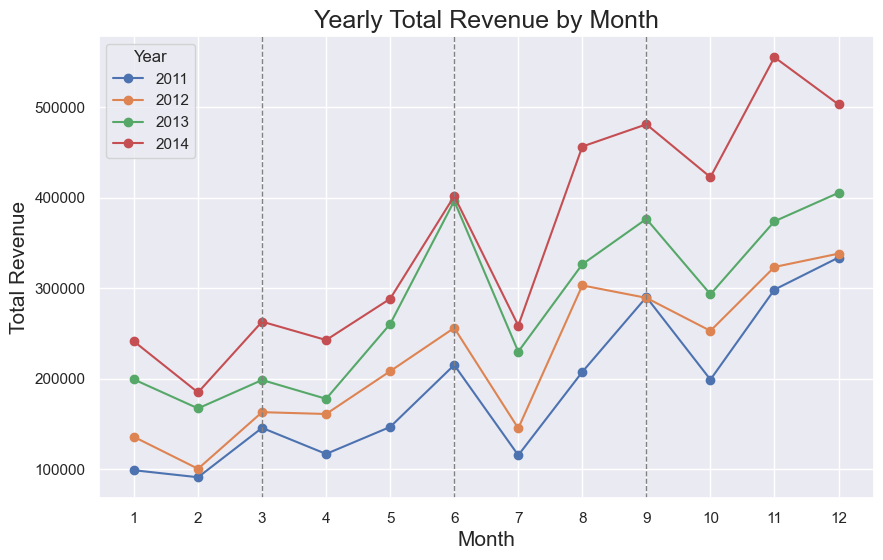

In [34]:
### Plotting Total Revenue by Year
yearly_rev_pivot = yearly_summary.pivot(index= "Month", columns= "Year", values= "Total_Sales")

yearly_rev_pivot.plot(marker= "o", figsize=(10, 6))
plt.title("Yearly Total Revenue by Month", fontsize=18)
plt.xlabel("Month", fontsize= 15)
plt.ylabel("Total Revenue", fontsize= 15)

for month in [3.5, 6.5, 9.5]:
    plt.axvline(x=month - 0.5, color='gray', linestyle='--', linewidth=1)

# Show Full Months
plt.xticks(yearly_rev_pivot.index)
plt.show()


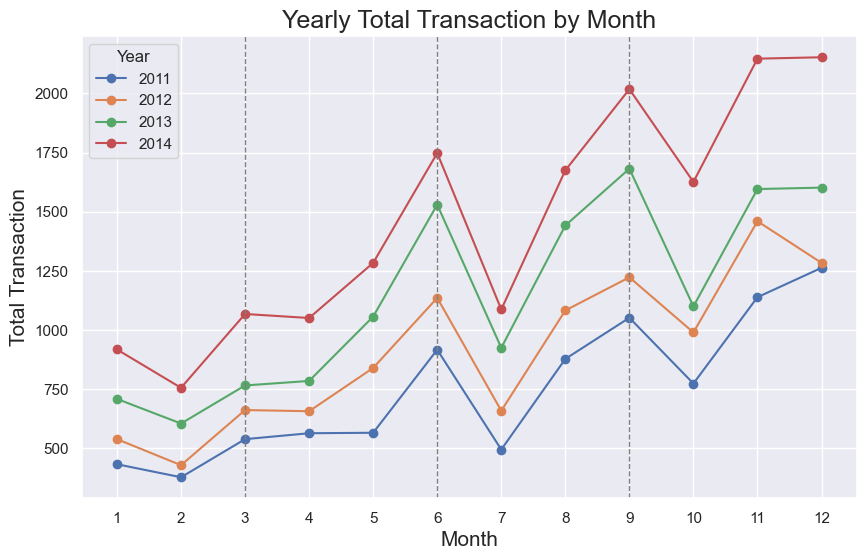

In [35]:
### Plotting Total Transaction by Year
yearly_transact_pivot = yearly_summary.pivot(index= "Month", columns= "Year", values= "Total_Transaction")

yearly_transact_pivot.plot(marker= "o", figsize=(10,6))
plt.title("Yearly Total Transaction by Month", fontsize= 18)
plt.xlabel("Month", fontsize= 15)
plt.ylabel("Total Transaction", fontsize= 15)

for month in [3.5, 6.5, 9.5]:
    plt.axvline(x=month - 0.5, color='gray', linestyle='--', linewidth=1)

# Show Full Months
plt.xticks(yearly_rev_pivot.index)
plt.show()


## **Exploring and Analyzing Market Regions Performance**
#### the analysis is centered on exploring and understanding the performance of different market regions. <br> The primary goal is to identify the most active and profitable regions, providing insights into their dynamics and contributing to informed decision-making.

In [36]:
# Market overview
# columns to aggregate, aggregations and column result names
agg_list_market =[
    ("Country", "nunique", "Total_Country"),
    ("Sales", "sum", "Total_Sales"),
    ("Sales", "mean", "Average_Sales"),
    ("Quantity", "sum", "Total_Orders"),
    ("Quantity", "mean", "Average_Orders")
]

# Result
Market_summary = (
    group_agg_type(agg_type= "multi", dataframe= data_cleaned, group_on= "Market", 
                   agg_on= agg_list_market, sort_column= "Total_Sales", ascending= False)
)

Market_summary

,Market,Total_Country,Total_Sales,Average_Sales,Total_Orders,Average_Orders
0,APAC,23,3592493.74,325.47,41297,3.74
4,EU,14,2856927.06,293.62,36776,3.78
6,US,1,2297200.86,229.86,37873,3.79
5,LATAM,24,2164605.17,210.28,38526,3.74
3,EMEA,39,880573.70,167.31,12443,2.36
1,Africa,45,783773.21,170.87,10564,2.30
2,Canada,1,66928.17,174.29,833,2.17


In [37]:
# Function to alter values format
def format_millions(x, pos):
    return f'{x/1e6:.1f}-M'

def format_thousands(x, pos):
    return f'{x/1e3:.0f}-K'

# Variable millions formatter
format_million = FuncFormatter(format_millions)

# Variable thousand formatter
format_thousand = FuncFormatter(format_thousands)

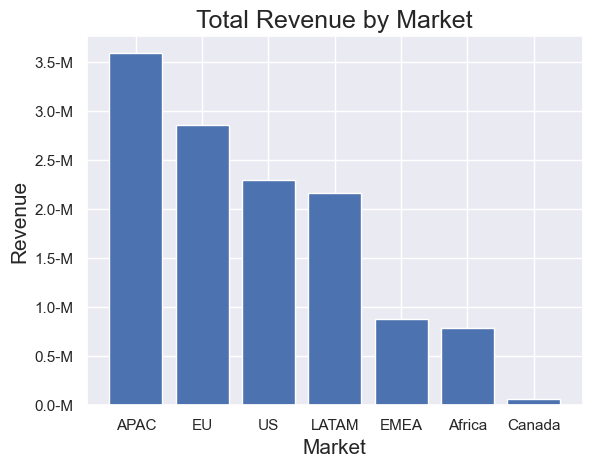

In [38]:
### Plotting Market "Revenue"
plt.bar(Market_summary["Market"] , Market_summary["Total_Sales"])

plt.title("Total Revenue by Market", fontsize= 18)
plt.xlabel("Market", fontsize= 15)
plt.ylabel("Revenue", fontsize = 15)

# Applying modified format
plt.gca().yaxis.set_major_formatter(format_million)
plt.show()

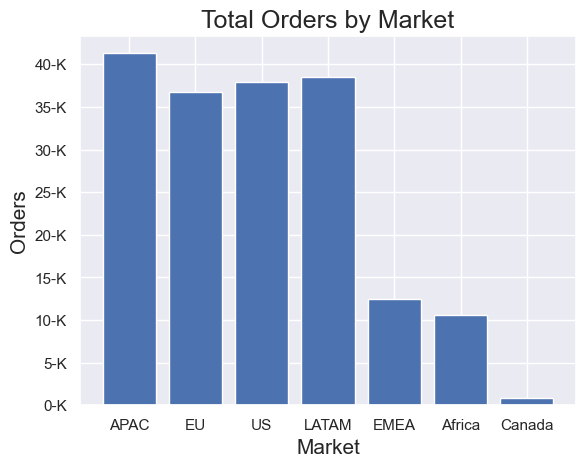

In [39]:
### Plotting Market "Orders"
plt.bar(Market_summary["Market"] , Market_summary["Total_Orders"])

plt.title("Total Orders by Market", fontsize= 18)
plt.xlabel("Market", fontsize= 15)
plt.ylabel("Orders", fontsize = 15)

# Applying modified format
plt.gca().yaxis.set_major_formatter(format_thousand)
plt.show()


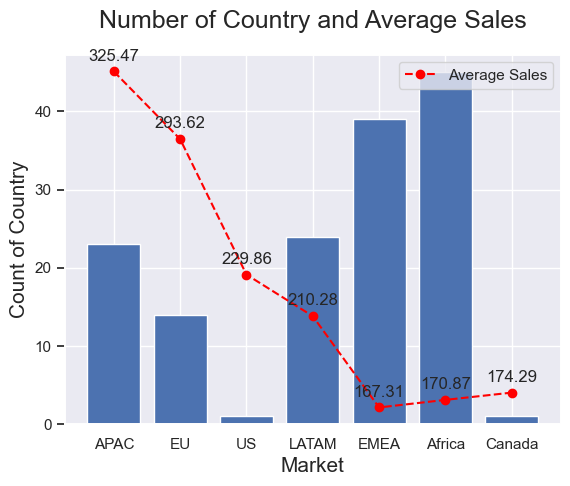

In [40]:
### Plotting total Countries under their Market and Average sales
fig, ax1 = plt.subplots()
ax1.bar(Market_summary["Market"], Market_summary["Total_Country"])

ax2 = ax1.twinx()
ax2.plot(Market_summary["Market"], Market_summary["Average_Sales"],
          color="red", linestyle= "dashed", marker= "o", label= "Average Sales")

plt.title("Number of Country and Average Sales", fontsize= 18, y= 1.05)
ax1.set_xlabel("Market", fontsize=15)
ax1.set_ylabel("Count of Country", fontsize=15)

# Hiding sub-plot axis values
ax2.set_yticks([])
ax2.set_yticklabels([])

# Displaying the subplot value above its markers
for i, txt in enumerate(Market_summary["Average_Sales"]):
    ax2.annotate(f"{txt:.2f}", (i, txt), textcoords="offset points", xytext=(0, 8), ha='center')

ax2.legend(loc="upper right")
plt.show()


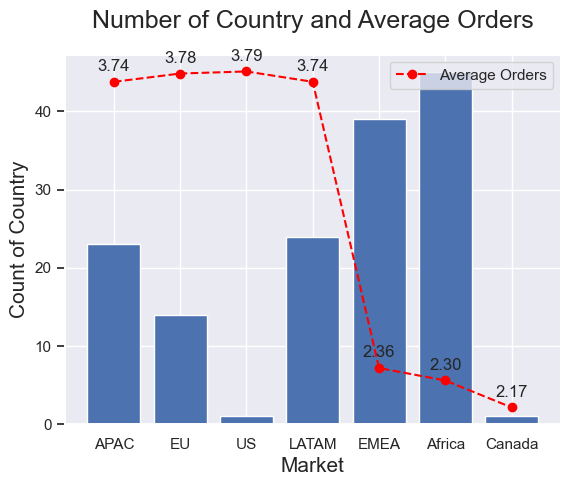

In [41]:
### Plotting total Countries under their Market and Average Orders
fig, ax1 = plt.subplots()
ax1.bar(Market_summary["Market"], Market_summary["Total_Country"])

ax2 = ax1.twinx()
ax2.plot(Market_summary["Market"], Market_summary["Average_Orders"],
          color="red", linestyle= "dashed", marker= "o", label= "Average Orders")

plt.title("Number of Country and Average Orders", fontsize= 18, y= 1.05)
ax1.set_xlabel("Market", fontsize=15)
ax1.set_ylabel("Count of Country", fontsize=15)

# Hiding sub-plot axis values
ax2.set_yticks([])
ax2.set_yticklabels([])

# Displaying the subplot value above its markers
for i, txt in enumerate(Market_summary["Average_Orders"]):
    ax2.annotate(f"{txt:.2f}", (i, txt), textcoords="offset points", xytext=(0, 8), ha='center')

ax2.legend(loc="upper right")
plt.show()

#### **Narrowing Down to Most Profitable and Active Markets**

In [42]:
# narrowing down to profitable markets based on the plot results
data_narrowed = data_cleaned[data_cleaned["Market"].isin(["APAC", "EU", "US", "LATAM"])].reset_index(drop= True)

In [43]:
# columns to aggregate, aggregations and column result names
agg_list_categ = [
    ("Product Name", "nunique", "Total_Products"),
    ("Sales", "sum", "Total_Sales"),
    ("Quantity", "sum", "Total_Orders")
]

# Result
Category_summary = (
    group_agg_type(
        agg_type= "multi", dataframe= data_narrowed,
        group_on= "Category", agg_on=agg_list_categ, sort_column="Total_Sales", ascending=False)
)

Category_summary

,Category,Total_Products,Total_Sales,Total_Orders
2,Technology,876,4068009.13,30560
0,Furniture,840,3656043.44,31478
1,Office Supplies,2071,3187174.26,92434


## **Analyzing and Identifying the Most Profitable Sub-Categories within each Category**
#### From the identified market regions, delving into the most in-demand product sub-categories to pinpoint high-demand products for consumers.

In [44]:
# Sub-Category Monthly Performance
# columns to aggregate, aggregations and column result names
agg_list_months_subcateg = [
    ("Product Name", "nunique", "Total_Products"),
    ("Sales", "sum", "Total_Sales"),
    ("Sales", "sum", "Average_Sales"),
    ("Quantity", "sum", "Total_Orders")
]

# Result
SubCateg_months_overview = (
    group_agg_type(
        agg_type= "multi", dataframe= data_narrowed, group_on= ["Month", "Category", "Sub Category"],
        agg_on= agg_list_months_subcateg, sort_column= "Total_Sales", ascending= False)
)

SubCateg_months_overview

,Month,Category,Sub Category,Total_Products,Total_Sales,Average_Sales,Total_Orders
186,11,Technology,Phones,196,187205.06,187205.06,1350
188,12,Furniture,Chairs,164,185172.12,185172.12,1500
171,11,Furniture,Chairs,162,182758.37,182758.37,1524
203,12,Technology,Phones,177,178590.91,178590.91,1225
136,9,Furniture,Bookcases,121,178261.86,178261.86,935
...,...,...,...,...,...,...,...
9,1,Office Supplies,Labels,79,3187.97,3187.97,378
25,2,Office Supplies,Fasteners,54,3143.61,3143.61,324
8,1,Office Supplies,Fasteners,55,3068.67,3068.67,339
60,4,Office Supplies,Labels,77,2971.73,2971.73,418


In [45]:
## Plotting Sub-Category performance for Category "Technology"
tech_data = SubCateg_months_overview[SubCateg_months_overview["Category"] == "Technology"]

# Group data to be pivot
grouped_tech_data = (
    group_agg_type(
        agg_type= "single", dataframe= tech_data, group_on= ["Month", "Sub Category"],
        agg_on= "Total_Sales", method= "sum", col_name= "Total_Sales")
)

grouped_tech_data.head(20)

,Month,Sub Category,Total_Sales
0,1,Accessories,23919.55
1,1,Copiers,64323.96
2,1,Machines,37156.30
3,1,Phones,62695.72
4,2,Accessories,32525.83
5,2,Copiers,48800.29
6,2,Machines,29284.44
7,2,Phones,59591.63
8,3,Accessories,30796.46
9,3,Copiers,91395.90


In [46]:
# Pivoted the data for plotting
pivot_tech_data = grouped_tech_data.pivot(index='Month', columns='Sub Category', values='Total_Sales')

pivot_tech_data

Sub Category,Accessories,Copiers,Machines,Phones
Month,,,,
1,23919.55,64323.96,37156.30,62695.72
2,32525.83,48800.29,29284.44,59591.63
3,30796.46,91395.90,55110.77,72101.63
4,37467.27,73699.55,38966.72,78938.39
5,43991.26,110587.23,45400.77,102091.09
6,68534.23,126927.89,63723.15,160853.00
7,46082.21,72822.55,33281.63,95370.03
8,66103.78,125772.56,50639.64,174812.80
9,80940.00,143274.32,70956.19,143070.97


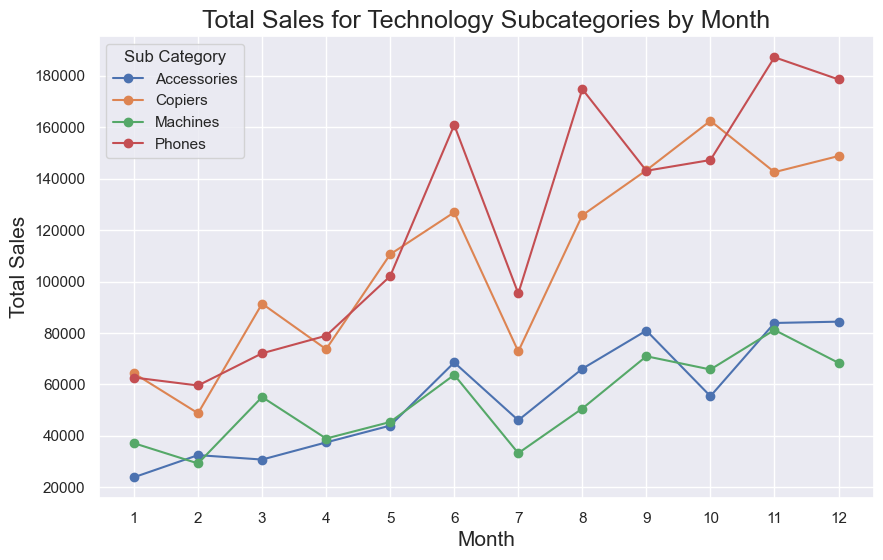

In [47]:
# Plotting and setting title and labels
pivot_tech_data.plot(marker='o', figsize=(10, 6))
plt.title("Total Sales for Technology Subcategories by Month", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)

# Showing full months
plt.xticks(pivot_tech_data.index)
plt.show()

In [48]:
# Extracting profitable Sub-Category under Technology based on the plot result
Tech_Selected = SubCateg_months_overview[
    (SubCateg_months_overview["Category"] == "Technology") & 
    (SubCateg_months_overview["Sub Category"].isin(["Phones","Copiers"]))
    ][["Category","Sub Category"]].drop_duplicates()

Tech_Selected

,Category,Sub Category
186,Technology,Phones
167,Technology,Copiers


In [49]:
## Plotting Sub-Category performance for Category "Furniture"
Furniture_data = SubCateg_months_overview[SubCateg_months_overview["Category"] == "Furniture"]

# Group_agg_one data to be pivot
grouped_furniture_data = Furniture_data.groupby(["Month", "Sub Category"])["Total_Sales"].sum().reset_index()

grouped_tech_data.head(20)

,Month,Sub Category,Total_Sales
0,1,Accessories,23919.55
1,1,Copiers,64323.96
2,1,Machines,37156.30
3,1,Phones,62695.72
4,2,Accessories,32525.83
5,2,Copiers,48800.29
6,2,Machines,29284.44
7,2,Phones,59591.63
8,3,Accessories,30796.46
9,3,Copiers,91395.90


In [50]:
# Pivoted the data for plotting
pivot_tech_furniture = grouped_furniture_data.pivot(index='Month', columns='Sub Category', values='Total_Sales')
pivot_tech_data

Sub Category,Accessories,Copiers,Machines,Phones
Month,,,,
1,23919.55,64323.96,37156.30,62695.72
2,32525.83,48800.29,29284.44,59591.63
3,30796.46,91395.90,55110.77,72101.63
4,37467.27,73699.55,38966.72,78938.39
5,43991.26,110587.23,45400.77,102091.09
6,68534.23,126927.89,63723.15,160853.00
7,46082.21,72822.55,33281.63,95370.03
8,66103.78,125772.56,50639.64,174812.80
9,80940.00,143274.32,70956.19,143070.97


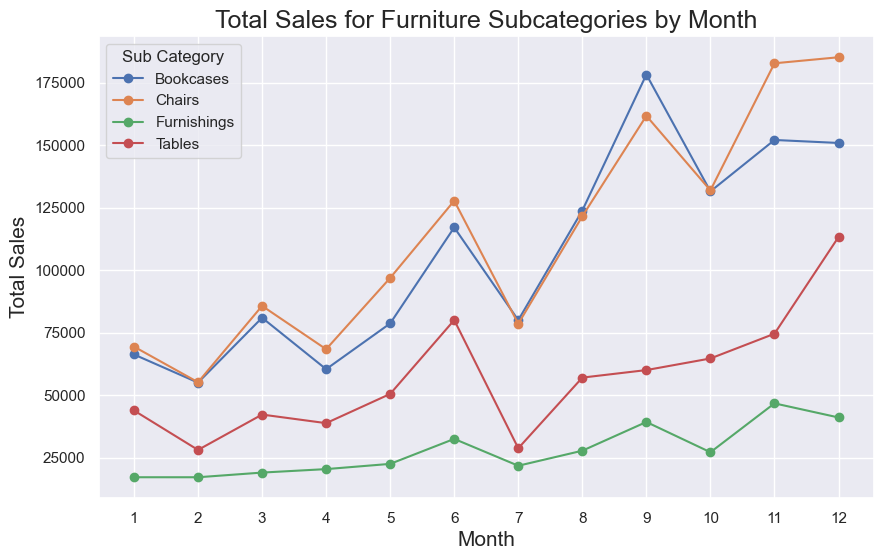

In [51]:
# Plotting and setting title and labels
pivot_tech_furniture.plot(marker='o', figsize=(10, 6))
plt.title("Total Sales for Furniture Subcategories by Month", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)

# Showing full months
plt.xticks(pivot_tech_furniture.index)
plt.show()


In [52]:
# Extracting profitable Sub-Category under Furniture based on the plot result
Furniture_Selected = SubCateg_months_overview[
    (SubCateg_months_overview["Category"] == "Furniture") & 
    (SubCateg_months_overview["Sub Category"].isin(["Bookcases","Chairs"]))
    ][["Category","Sub Category"]].drop_duplicates()

Furniture_Selected

,Category,Sub Category
188,Furniture,Chairs
136,Furniture,Bookcases


In [53]:
## Plotting Sub-Category performance for Category "Office Supplies"
OfficeSup_data = SubCateg_months_overview[SubCateg_months_overview["Category"] == "Office Supplies"]

# Grouping data to be pivot
grouped_officeSup_data = (
    group_agg_type(
        agg_type= "single", dataframe= OfficeSup_data, group_on= ["Month", "Sub Category"],
        agg_on= "Total_Sales", method= "sum", col_name= "Total_Sales")
)

grouped_officeSup_data.head(20)

,Month,Sub Category,Total_Sales
0,1,Appliances,57862.72
1,1,Art,16146.22
2,1,Binders,21876.33
3,1,Envelopes,7254.80
4,1,Fasteners,3068.67
5,1,Labels,3187.97
6,1,Paper,9957.34
7,1,Storage,53402.44
8,1,Supplies,10986.94
9,2,Appliances,31990.47


In [54]:
# Pivoted the data for plotting
pivot_officesup_furniture = grouped_officeSup_data.pivot(index='Month', columns='Sub Category', values='Total_Sales')
pivot_officesup_furniture

Sub Category,Appliances,Art,Binders,Envelopes,Fasteners,Labels,Paper,Storage,Supplies
Month,,,,,,,,,
1,57862.72,16146.22,21876.33,7254.80,3068.67,3187.97,9957.34,53402.44,10986.94
2,31990.47,11330.55,13505.60,5460.35,3143.61,2118.14,7157.18,35092.75,7822.05
3,42456.35,14761.09,25727.09,9587.67,4397.40,3510.93,13137.46,54929.32,19787.66
4,48314.93,15840.33,24661.31,9054.25,5001.75,2971.73,11354.56,60808.16,14849.64
5,70656.69,22711.05,24152.77,10736.97,5731.46,4889.89,19502.03,67707.47,14016.36
6,83477.47,28476.66,34798.49,15019.74,8436.35,7344.12,21351.46,76803.15,19805.61
7,47846.87,16901.29,18731.37,8699.50,3777.23,4374.15,12262.61,59724.91,19374.10
8,96688.18,32709.03,45371.90,13856.04,8120.44,7150.33,21460.39,85574.15,19051.23
9,89104.76,36903.47,58261.77,18668.92,8348.26,7254.44,22218.71,107435.54,24545.48


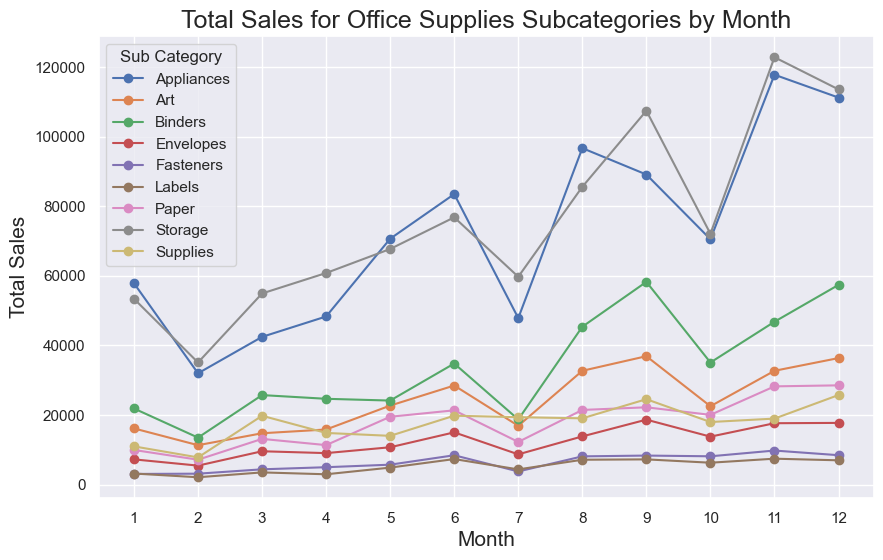

In [55]:
# Plotting and setting title and labels
pivot_officesup_furniture.plot(marker='o', figsize=(10, 6))
plt.title("Total Sales for Office Supplies Subcategories by Month", fontsize=18)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Total Sales", fontsize=15)

# Showing full months
plt.xticks(pivot_tech_furniture.index)
plt.show()



In [56]:
# Extracting profitable Sub-Category under Office Supplies based on the plot result
OfficeSup_Selected = SubCateg_months_overview[
    (SubCateg_months_overview["Category"] == "Office Supplies") & 
    (SubCateg_months_overview["Sub Category"].isin(["Appliances","Storage"]))
    ][["Category","Sub Category"]].drop_duplicates()



#### **Narrowing Down to Identified High Demand Sub-Categories**

In [57]:
# Combining Selected Sub-Categories
combined_selected = pd.concat([Tech_Selected, Furniture_Selected, OfficeSup_Selected], axis= 0, ignore_index= True)
combined_selected

,Category,Sub Category
0,Technology,Phones
1,Technology,Copiers
2,Furniture,Chairs
3,Furniture,Bookcases
4,Office Supplies,Storage
5,Office Supplies,Appliances


In [58]:
# Filtering the dataframe with the selected Sub-Categories
Filtered_data = data_narrowed[data_narrowed["Sub Category"].isin(combined_selected["Sub Category"])]

Filtered_data.head(10)

,Formatted Date,Year,Month,Quarter,Country,Market,Sub Category,Category,Product Name,Sales,Quantity
1,2013-02-05,2013,2,1,Australia,APAC,Chairs,Furniture,"Novimex Executive Leather Armchair, Black",3709.395,9
2,2013-10-17,2013,10,4,Australia,APAC,Phones,Technology,"Nokia Smart Phone, with Caller ID",5175.171,9
3,2013-01-28,2013,1,1,Germany,EU,Phones,Technology,"Motorola Smart Phone, Cordless",2892.510,5
4,2013-06-28,2013,6,2,Australia,APAC,Phones,Technology,"Samsung Smart Phone, with Caller ID",2862.675,5
5,2011-11-07,2011,11,4,New Zealand,APAC,Chairs,Furniture,"Novimex Executive Leather Armchair, Adjustable",1822.080,4
11,2012-11-13,2012,11,4,Brazil,LATAM,Chairs,Furniture,"Harbour Creations Executive Leather Armchair, ...",2221.800,7
12,2013-06-06,2013,6,2,China,APAC,Appliances,Office Supplies,"KitchenAid Microwave, White",3701.520,12
13,2014-07-31,2014,7,3,France,EU,Appliances,Office Supplies,"Breville Refrigerator, Red",1869.588,4
15,2014-09-08,2014,9,3,Italy,EU,Appliances,Office Supplies,"Hoover Stove, Red",7958.580,14
16,2014-01-31,2014,1,1,Australia,APAC,Copiers,Technology,"Brother Fax Machine, High-Speed",2565.594,9


In [59]:
# Checking the filtered data
Filtered_data[["Category", "Sub Category"]].drop_duplicates().reset_index(drop= True)

,Category,Sub Category
0,Furniture,Chairs
1,Technology,Phones
2,Office Supplies,Appliances
3,Technology,Copiers
4,Furniture,Bookcases
5,Office Supplies,Storage


## **Identifying Top Products**

#### Extracting High-Performing Products from Identified High-Demand Sub-Categories, utilizing functions and applying conditions.

#### **Conditions :** 
* Products must be consistently present in 2011-2014
* Top Revenue from specified Quarter

In [60]:
# Function to extract top products for each selected Sub-category and present in years 2011-2014
def quarter_top_products(df, quarter, top):

    # filtering the specfied dataframe
    quarter_df = df[df["Year"].isin([2011, 2012, 2013, 2014]) & (df["Quarter"]== quarter)]

    # columns to aggregate, aggregations and column result names
    agg_list = [
        ("Sales", "sum", "Total_Sales"),
        ("Quantity", "sum", "Total_Quantity")
    ]

    # group data and applying aggregation methods
    grouped_quarter_df = group_agg_type(
        agg_type= "multi", dataframe= quarter_df, group_on= ["Quarter", "Category","Sub Category","Product Name"],
        agg_on= agg_list, sort_column= "Total_Sales", ascending= False)
    
    # Function to extract top n products
    def top_n(df_check, column, n= None):
        return df_check.nlargest(n, column)

    # extracting top products by applying the function
    top_n_products = (
        grouped_quarter_df.groupby(["Quarter", "Sub Category"], group_keys= False)
        .apply(lambda x: top_n(x, column= "Total_Sales", n= top)).reset_index(drop= True)
        )
    
    return top_n_products


In [61]:
# Extracting top 10 products for each quarter
top_products_quarters = pd.concat(
    [quarter_top_products(df = Filtered_data, quarter= 1, top= 10),
     quarter_top_products(df = Filtered_data, quarter= 2, top= 10),
     quarter_top_products(df = Filtered_data, quarter= 3, top= 10),
     quarter_top_products(df = Filtered_data, quarter= 4, top= 10)], 
     axis= 0, ignore_index= True).drop_duplicates()

top_products_quarters

,Quarter,Category,Sub Category,Product Name,Total_Sales,Total_Quantity
0,1,Office Supplies,Appliances,"Hoover Stove, White",9979.89,21
1,1,Office Supplies,Appliances,"KitchenAid Refrigerator, Black",7910.55,15
2,1,Office Supplies,Appliances,"Breville Microwave, Silver",6089.53,29
3,1,Office Supplies,Appliances,"Hamilton Beach Stove, Silver",5430.90,10
4,1,Office Supplies,Appliances,"Cuisinart Refrigerator, Black",4955.10,10
...,...,...,...,...,...,...
235,4,Office Supplies,Storage,"Eldon Lockers, Industrial",6303.51,36
236,4,Office Supplies,Storage,"Smead File Cart, Single Width",6157.60,60
237,4,Office Supplies,Storage,"Eldon File Cart, Single Width",6039.18,63
238,4,Office Supplies,Storage,Tennsco Double-Tier Lockers,5535.49,28


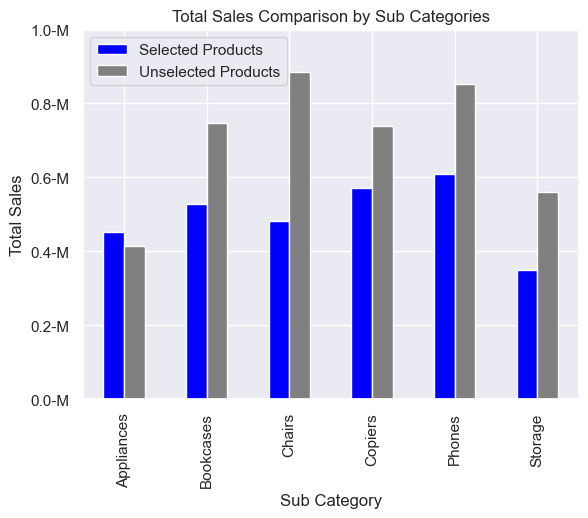

In [62]:

### Plotting Selected Products and Unselected Products Total Revenue
unselected_products = Filtered_data[~Filtered_data["Product Name"].isin(top_products_quarters["Product Name"])]
selected_products = Filtered_data[Filtered_data["Product Name"].isin(top_products_quarters["Product Name"])]

unselected_group_sales = group_agg_type(
    agg_type= "single", dataframe= unselected_products, group_on= "Sub Category", 
    agg_on= "Sales", method= "sum", col_name= "Total_Sales"
    )

selected_group_sales = group_agg_type(
    agg_type= "single", dataframe= selected_products, group_on= "Sub Category",
    agg_on= "Sales", method= "sum", col_name= "Total_Sales"
)

concat_products = pd.concat([selected_group_sales, unselected_group_sales], keys=["Selected Products", "Unselected Products"])
pivoted_products = concat_products.reset_index().pivot(index= "Sub Category", columns= "level_0", values= "Total_Sales")

colors = {"Selected Products" : "blue", "Unselected Products": "gray"}

ax = pivoted_products.plot(kind='bar', color=[colors[col] for col in pivoted_products.columns])
ax.legend(['Selected Products', 'Unselected Products'])

plt.xlabel('Sub Category')
plt.ylabel('Total Sales')
plt.title('Total Sales Comparison by Sub Categories')

plt.gca().yaxis.set_major_formatter(format_million)
plt.ylim(0, 1000000)
plt.show()


## **Comparing Total Sales of Selected vs. Unselected Products**
#### Illustrates the impact of identified products by comparing their performance throughout the year using historical data.

In [63]:
# Total count of selected products
selected_df_check = pd.DataFrame({ "Selection_Status" : ["Selected"]})

selected_df_check["Total_Products"] = (
    top_products_quarters["Product Name"].nunique()
    )

selected_df_check

,Selection_Status,Total_Products
0,Selected,146


In [64]:
# total revenue of selected products
selected_df_check["Total_Revenue"] = (
    data_cleaned[data_cleaned["Product Name"].isin(top_products_quarters["Product Name"])]["Sales"].sum().round(2)
)

selected_df_check

,Selection_Status,Total_Products,Total_Revenue
0,Selected,146,3490174.32


In [65]:
# total count of unselected products
unselected_df_check = pd.DataFrame({ "Selection_Status" : ["Unselected"]})

unselected_df_check["Total_Products"] = (
    data_cleaned[~data_cleaned["Product Name"].isin(top_products_quarters["Product Name"])]["Product Name"].nunique()
)

unselected_df_check

,Selection_Status,Total_Products
0,Unselected,3642


In [66]:
# total revenue for unselected products
unselected_df_check["Total_Revenue"]= (
    data_cleaned[~data_cleaned["Product Name"].isin(top_products_quarters["Product Name"])]["Sales"].sum().round(2)
)

unselected_df_check

,Selection_Status,Total_Products,Total_Revenue
0,Unselected,3642,9152327.59


In [67]:
# Combining selected & unselected
Sel_Unsel = pd.concat([selected_df_check, unselected_df_check],axis= 0, ignore_index= True)

Sel_Unsel

,Selection_Status,Total_Products,Total_Revenue
0,Selected,146,3490174.32
1,Unselected,3642,9152327.59


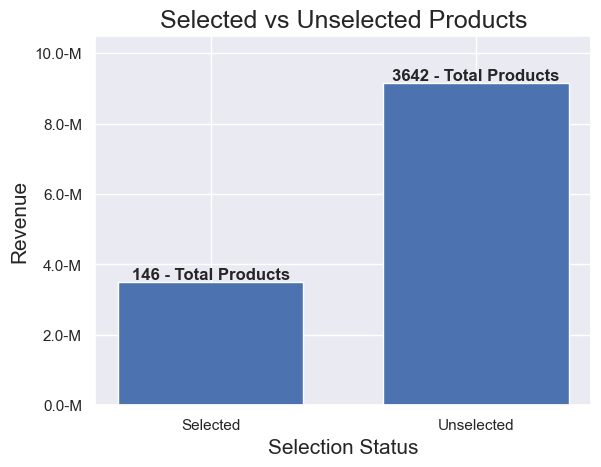

In [68]:
## Plotting total revenue and product count to compare selected & unselected products
bars = plt.bar(Sel_Unsel["Selection_Status"] , Sel_Unsel["Total_Revenue"],width= 0.7)

plt.title("Selected vs Unselected Products", fontsize= 18)
plt.xlabel("Selection Status", fontsize= 15)
plt.ylabel("Revenue", fontsize = 15)

# adding total products count to each bars
for bar, total_products in zip(bars, Sel_Unsel["Total_Products"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{total_products} - Total Products",
             ha= "center", va= "bottom", fontsize= 12, fontweight= "bold")

# Applying modified format
plt.gca().yaxis.set_major_formatter(format_million)
plt.ylim(0, 10500000)
plt.show()

In [69]:
# comparing revenue of selected vs grand total revenue in percentage
(selected_df_check["Total_Revenue"] / (unselected_df_check["Total_Revenue"] + selected_df_check["Total_Revenue"])).round(2) * 100

0    28.0
Name: Total_Revenue, dtype: float64

## **Data Preparation for Export**
#### Preparing Data for Excel's Data Modeling to utilize its Power Query and Power Pivot by adding primary and foreign keys to each table for relationship connection.<br>This enables the use of DAX (Data Analysis Expressions) calculations, eliminating formula dependency.


In [70]:
# Exporting data frames to make data model in excel for dynamic visualization
# Function for exporting
def export_file(dataframe, filename):
    csv_path = os.path.join("_Project_2/Data_Modeling_(Tables)", filename)
    dataframe.to_csv(csv_path, index= False)


In [71]:
# DIM_Products table
# Concatinating selecting products
product_table_selected = top_products_quarters[["Product Name", "Sub Category", "Category"]].drop_duplicates().reset_index(drop= True)

product_table_selected

,Product Name,Sub Category,Category
0,"Hoover Stove, White",Appliances,Office Supplies
1,"KitchenAid Refrigerator, Black",Appliances,Office Supplies
2,"Breville Microwave, Silver",Appliances,Office Supplies
3,"Hamilton Beach Stove, Silver",Appliances,Office Supplies
4,"Cuisinart Refrigerator, Black",Appliances,Office Supplies
...,...,...,...
141,"Motorola Smart Phone, with Caller ID",Phones,Technology
142,"Fellowes Lockers, Wire Frame",Storage,Office Supplies
143,"Eldon Lockers, Industrial",Storage,Office Supplies
144,Tennsco Double-Tier Lockers,Storage,Office Supplies


In [72]:
# Adding 'Flag' column
product_table_selected["Flag"] = "Selected"

product_table_selected

,Product Name,Sub Category,Category,Flag
0,"Hoover Stove, White",Appliances,Office Supplies,Selected
1,"KitchenAid Refrigerator, Black",Appliances,Office Supplies,Selected
2,"Breville Microwave, Silver",Appliances,Office Supplies,Selected
3,"Hamilton Beach Stove, Silver",Appliances,Office Supplies,Selected
4,"Cuisinart Refrigerator, Black",Appliances,Office Supplies,Selected
...,...,...,...,...
141,"Motorola Smart Phone, with Caller ID",Phones,Technology,Selected
142,"Fellowes Lockers, Wire Frame",Storage,Office Supplies,Selected
143,"Eldon Lockers, Industrial",Storage,Office Supplies,Selected
144,Tennsco Double-Tier Lockers,Storage,Office Supplies,Selected


In [73]:
# Extracting unselected products
product_table_unselected = (
    data_cleaned[["Product Name", "Sub Category", "Category"]]
    [~data_cleaned["Product Name"].isin(product_table_selected["Product Name"])].drop_duplicates().reset_index(drop= True)
)

product_table_unselected

,Product Name,Sub Category,Category
0,Plantronics CS510 - Over-the-Head monaural Wir...,Accessories,Technology
1,"Sharp Wireless Fax, High-Speed",Copiers,Technology
2,"Chromcraft Conference Table, Fully Assembled",Tables,Furniture
3,Fellowes PB500 Electric Punch Plastic Comb Bin...,Binders,Office Supplies
4,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Tables,Furniture
...,...,...,...
3637,SanDisk Cruzer 8 GB USB Flash Drive,Accessories,Technology
3638,Letter Slitter,Supplies,Office Supplies
3639,Kleencut Forged Office Shears by Acme United C...,Supplies,Office Supplies
3640,Holmes Visible Mist Ultrasonic Humidifier with...,Appliances,Office Supplies


In [74]:
# Extracting unselected products
product_table_unselected = (
    data_cleaned[["Product Name", "Sub Category", "Category"]]
    [~data_cleaned["Product Name"].isin(product_table_selected["Product Name"])].drop_duplicates().reset_index(drop= True)
)

product_table_unselected

,Product Name,Sub Category,Category
0,Plantronics CS510 - Over-the-Head monaural Wir...,Accessories,Technology
1,"Sharp Wireless Fax, High-Speed",Copiers,Technology
2,"Chromcraft Conference Table, Fully Assembled",Tables,Furniture
3,Fellowes PB500 Electric Punch Plastic Comb Bin...,Binders,Office Supplies
4,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Tables,Furniture
...,...,...,...
3637,SanDisk Cruzer 8 GB USB Flash Drive,Accessories,Technology
3638,Letter Slitter,Supplies,Office Supplies
3639,Kleencut Forged Office Shears by Acme United C...,Supplies,Office Supplies
3640,Holmes Visible Mist Ultrasonic Humidifier with...,Appliances,Office Supplies


In [75]:
# Adding 'Flag' column
product_table_unselected["Flag"] = "Unselected"

In [76]:
# Concatinating selected and unselected product tables
DIM_Product = pd.concat([product_table_selected, product_table_unselected], axis= 0 , ignore_index= True)

DIM_Product

,Product Name,Sub Category,Category,Flag
0,"Hoover Stove, White",Appliances,Office Supplies,Selected
1,"KitchenAid Refrigerator, Black",Appliances,Office Supplies,Selected
2,"Breville Microwave, Silver",Appliances,Office Supplies,Selected
3,"Hamilton Beach Stove, Silver",Appliances,Office Supplies,Selected
4,"Cuisinart Refrigerator, Black",Appliances,Office Supplies,Selected
...,...,...,...,...
3783,SanDisk Cruzer 8 GB USB Flash Drive,Accessories,Technology,Unselected
3784,Letter Slitter,Supplies,Office Supplies,Unselected
3785,Kleencut Forged Office Shears by Acme United C...,Supplies,Office Supplies,Unselected
3786,Holmes Visible Mist Ultrasonic Humidifier with...,Appliances,Office Supplies,Unselected


In [77]:
# Adding Primary key "Product ID"
DIM_Product.insert(0, "Product ID", range(1, len(DIM_Product)+ 1))

DIM_Product

,Product ID,Product Name,Sub Category,Category,Flag
0,1,"Hoover Stove, White",Appliances,Office Supplies,Selected
1,2,"KitchenAid Refrigerator, Black",Appliances,Office Supplies,Selected
2,3,"Breville Microwave, Silver",Appliances,Office Supplies,Selected
3,4,"Hamilton Beach Stove, Silver",Appliances,Office Supplies,Selected
4,5,"Cuisinart Refrigerator, Black",Appliances,Office Supplies,Selected
...,...,...,...,...,...
3783,3784,SanDisk Cruzer 8 GB USB Flash Drive,Accessories,Technology,Unselected
3784,3785,Letter Slitter,Supplies,Office Supplies,Unselected
3785,3786,Kleencut Forged Office Shears by Acme United C...,Supplies,Office Supplies,Unselected
3786,3787,Holmes Visible Mist Ultrasonic Humidifier with...,Appliances,Office Supplies,Unselected


In [78]:
# DIM_location table
# Extracting unique country
DIM_location = data_cleaned[["Country","Market"]].drop_duplicates().reset_index(drop= True)

DIM_location

,Country,Market
0,United States,US
1,Australia,APAC
2,Germany,EU
3,Senegal,Africa
4,New Zealand,APAC
...,...,...
142,Burundi,Africa
143,Macedonia,EMEA
144,Eritrea,Africa
145,Equatorial Guinea,Africa


In [79]:
target_markets= data_narrowed[["Market"]].drop_duplicates()

target_markets

,Market
0,US
1,APAC
3,EU
11,LATAM


In [80]:
# Looping to Add flag
for x in DIM_location.index:
    if DIM_location.loc[x, "Market"] in data_narrowed["Market"].values:
        DIM_location.at[x,"Flag"] = "Selected"
        
    else:
        DIM_location.at[x, "Flag"] = "Unselected"

In [81]:
# Adding primary key "Country ID"
DIM_location.insert(0, "Country ID", range(100, 100 + len(DIM_location)))

DIM_location

,Country ID,Country,Market,Flag
0,100,United States,US,Selected
1,101,Australia,APAC,Selected
2,102,Germany,EU,Selected
3,103,Senegal,Africa,Unselected
4,104,New Zealand,APAC,Selected
...,...,...,...,...
142,242,Burundi,Africa,Unselected
143,243,Macedonia,EMEA,Unselected
144,244,Eritrea,Africa,Unselected
145,245,Equatorial Guinea,Africa,Unselected


In [82]:
# DIM_Date
# Identifying starting date and last date
data_cleaned["Formatted Date"].min()

Timestamp('2011-01-01 00:00:00')

In [83]:
data_cleaned["Formatted Date"].max()

Timestamp('2014-12-31 00:00:00')

In [84]:
start_date = "2011-01-01"
end_date = "2014-12-31"

In [85]:
# data range
date_range = pd.date_range(start= start_date, end= end_date, freq= "D")

In [86]:
# Dataframe
DIM_date = pd.DataFrame({"Date": date_range})

DIM_date.head(10)

,Date
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
5,2011-01-06
6,2011-01-07
7,2011-01-08
8,2011-01-09
9,2011-01-10


In [87]:
# Adding additional date columns
DIM_date["Year"] = DIM_date["Date"].dt.year
DIM_date["Month_No"] = DIM_date["Date"].dt.month
DIM_date["Month_Name"] = DIM_date["Date"].dt.month_name().str[:3]
DIM_date["Quarter"] = DIM_date["Date"].dt.quarter

DIM_date.head(10)

,Date,Year,Month_No,Month_Name,Quarter
0,2011-01-01,2011,1,Jan,1
1,2011-01-02,2011,1,Jan,1
2,2011-01-03,2011,1,Jan,1
3,2011-01-04,2011,1,Jan,1
4,2011-01-05,2011,1,Jan,1
5,2011-01-06,2011,1,Jan,1
6,2011-01-07,2011,1,Jan,1
7,2011-01-08,2011,1,Jan,1
8,2011-01-09,2011,1,Jan,1
9,2011-01-10,2011,1,Jan,1


In [88]:
# FACT_table table
FACT_table = data_cleaned[[
    'Formatted Date', 
    # 'Year', 'Month', 'Quarter', 
    'Country', 
    # 'Market','Sub Category', 'Category', 
    'Product Name', 'Sales', 'Quantity']].rename(columns={"Formatted Date" : "Date"})

FACT_table.head()

,Date,Country,Product Name,Sales,Quantity
0,2012-07-31,United States,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7
1,2013-02-05,Australia,"Novimex Executive Leather Armchair, Black",3709.395,9
2,2013-10-17,Australia,"Nokia Smart Phone, with Caller ID",5175.171,9
3,2013-01-28,Germany,"Motorola Smart Phone, Cordless",2892.510,5
4,2013-11-05,Senegal,"Sharp Wireless Fax, High-Speed",2832.960,8


In [89]:
# Create a dictionary for mapping values
product_id_mapping = dict(zip(DIM_Product["Product Name"], DIM_Product["Product ID"]))
country_id_mapping = dict(zip(DIM_location["Country"], DIM_location["Country ID"]))

In [90]:
# Adding product ID to Fact table
FACT_table["Product ID"]= FACT_table["Product Name"].map(product_id_mapping).astype("Int64")

# Adding Country ID to Fact table
FACT_table["Country ID"] = FACT_table["Country"].map(country_id_mapping)

FACT_table.head(20)

,Date,Country,Product Name,Sales,Quantity,Product ID,Country ID
0,2012-07-31,United States,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,147,100
1,2013-02-05,Australia,"Novimex Executive Leather Armchair, Black",3709.395,9,24,101
2,2013-10-17,Australia,"Nokia Smart Phone, with Caller ID",5175.171,9,43,101
3,2013-01-28,Germany,"Motorola Smart Phone, Cordless",2892.510,5,46,102
4,2013-11-05,Senegal,"Sharp Wireless Fax, High-Speed",2832.960,8,148,103
5,2013-06-28,Australia,"Samsung Smart Phone, with Caller ID",2862.675,5,91,101
6,2011-11-07,New Zealand,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,26,104
7,2012-04-14,New Zealand,"Chromcraft Conference Table, Fully Assembled",5244.840,6,149,104
8,2014-10-14,United States,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,150,100
9,2012-01-28,United States,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,151,100


In [91]:
# Organizing columns and dropping columns
FACT_table.columns

Index(['Date', 'Country', 'Product Name', 'Sales', 'Quantity', 'Product ID',
       'Country ID'],
      dtype='object')

In [92]:
FACT_table = FACT_table[[
    'Date', 'Product ID', 'Country ID',
    #'Country', 'Product Name', 
    'Sales', 'Quantity'
]]

FACT_table.head()

,Date,Product ID,Country ID,Sales,Quantity
0,2012-07-31,147,100,2309.650,7
1,2013-02-05,24,101,3709.395,9
2,2013-10-17,43,101,5175.171,9
3,2013-01-28,46,102,2892.510,5
4,2013-11-05,148,103,2832.960,8


#### **Exported as CSV file type**

In [93]:
# Exporting files into CSV's

# DIM_Product CSV
export_file(DIM_Product, "DIM_Product.csv")

# DIM_location CSV
export_file(DIM_location, "DIM_location.csv")

# DIM_date CSV
export_file(DIM_date, "DIM_date.csv")

# FACT_table CSV
export_file(FACT_table, "FACT_table.csv")

# Overview Comparison CSV
export_file(Sel_Unsel, "Overview.csv")